# Text Classification

## 1 - Library Imports

In [1]:
%reset -f

# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

TEST_DIR = os.path.join(ROOT_DIR, "test-white-papers")
MODEL_DIR = os.path.join(ROOT_DIR, "model")

# Change Keras Environment to Theano, in case Tensorflow doesn't work
import os; os.environ['KERAS_BACKEND'] = 'theano'

# Import own functions
from libraries import corpus
from libraries import pdf2text

##########################
# Import other libraries
##########################

# Data Processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Text Analysis
import nltk 

# Machine Learning Libraries
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import itertools

# Tensorflow Utilities
import tensorflow as tf
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

# Neural Network Libraries
from tensorflow import keras
from keras import utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence

import warnings
warnings.filterwarnings("ignore")

Using Theano backend.


In [2]:
# To reload own libraries when a change is made
from importlib import reload
reload(corpus)

<module 'libraries.corpus' from '/home/diego_conejo/datascience_project/libraries/corpus.py'>

## 2 - Data Preprocessing

In [3]:
# Retrieving the PDF files from white-paper folder and converting them to text
dataset = pdf2text.get_dataset()

In [4]:
# Print all the white papers' names
dataset.keys()

dict_keys(['bytom', 'crypto', 'fantom', 'steem', 'status', 'metal', 'chainlink', 'gnosis', 'mixin', 'wanchain', 'hyperion', 'dai', 'hypercash', 'ark', 'tezos', 'gxchain', 'iexecrlc', 'digixdao', 'bhpcoin', 'golem', 'waves', 'pundix', 'vechain', 'nano', 'cosmocoin', 'loopring', 'ravencoin', 'horizen', 'orbs', 'monero', 'latoken', 'paxosstandardtoken', 'inocoin', 'xrp', 'eos', 'aion', 'celernetwork', 'singularitynet', 'thundertoken', 'ethereumclassic', 'ardor', 'tron', 'synthetixnetworktoken', '0x', 'zilliqa', 'nebulas', 'zcash', 'maidsafecoin', 'dent', 'nexo', 'solve', 'abbccoin', 'iota', 'bitcoingold', 'enjincoin', 'bytecoin', 'omisego', 'ethereum', 'obyte', 'ontology', 'elastos', 'metaverseetp', 'basicattentiontoken', 'decentraland', 'komodo', 'bittorrent', 'theta', 'japancontenttoken', 'utrust', 'tenx', 'binancecoin', 'factom', 'usdcoin', 'apollocurrency', 'skycoin', 'tether', 'bitshares', 'wax', 'riftoken', 'waltonchain', '#metahash', 'thetafuel', 'truechain', 'nkn', 'nem', 'bitcoin

In [5]:
# Print the size of the Train dataset
len(dataset.keys())

99

In [6]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = True
# Creates a dictionary with each White Paper and its text pre-processed
corpora_sent = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=True)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: bytom
Cleaning: crypto
Cleaning: fantom
Cleaning: zilliqa
Cleaning: nebulas
Cleaning: zcash
Cleaning: maidsafecoin
Cleaning: dent
Cleaning: nexo
Cleaning: solve
Cleaning: abbccoin
Cleaning: iota
Cleaning: bitcoingold
Cleaning: enjincoin
Cleaning: bytecoin
Cleaning: omisego
Cleaning: ethereum
Cleaning: obyte
Cleaning: ontology
Cleaning: elastos
Cleaning: metaverseetp
Cleaning: basicattentiontoken
Cleaning: decentraland
Cleaning: komodo
Cleaning: bittorrent
Cleaning: theta
Cleaning: japancontenttoken
Cleaning: utrust
Cleaning: tenx
Cleaning: binancecoin
Cleaning: factom
Cleaning: usdcoin
Cleaning: apollocurrency
Cleaning: skycoin
Cleaning: tether
Cleaning: bitshares
Cleaning: wax
Cleaning: riftoken
Cleaning: waltonchain
Cleaning: #metahash
Cleaning: thetafuel
Cleaning: truechain
Cleaning: nkn
Cleaning: nem
Cleaning: bitcoin
Cleaning: dogecoin
Cleaning: maker
Cleaning: lina
Cleaning: powerledger
Cleaning: stellar
Cleaning: cryptonex
Cleaning: particl
Cleaning: stratis
Cleaning: 

In [7]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora_whole = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=True)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: bytom
Cleaning: crypto
Cleaning: fantom
Cleaning: steem
Cleaning: status
Cleaning: metal
Cleaning: chainlink
Cleaning: gnosis
Cleaning: mixin
Cleaning: wanchain
Cleaning: hyperion
Cleaning: dai
Cleaning: hypercash
Cleaning: ark
Cleaning: tezos
Cleaning: gxchain
Cleaning: iexecrlc
Cleaning: digixdao
Cleaning: bhpcoin
Cleaning: golem
Cleaning: waves
Cleaning: pundix
Cleaning: vechain
Cleaning: nano
Cleaning: cosmocoin
Cleaning: loopring
Cleaning: ravencoin
Cleaning: horizen
Cleaning: orbs
Cleaning: monero
Cleaning: latoken
Cleaning: paxosstandardtoken
Cleaning: inocoin
Cleaning: xrp
Cleaning: eos
Cleaning: aion
Cleaning: celernetwork
Cleaning: singularitynet
Cleaning: thundertoken
Cleaning: ethereumclassic
Cleaning: ardor
Cleaning: tron
Cleaning: synthetixnetworktoken
Cleaning: 0x
Cleaning: zilliqa
Cleaning: nebulas
Cleaning: zcash
Cleaning: maidsafecoin
Cleaning: dent
Cleaning: nexo
Cleaning: solve
Cleaning: abbccoin
Cleaning: iota
Cleaning: bitcoingold
Cleaning: enjincoin
Cle

## 3 - Methods Application

### Text Classification with Blockchain Protocol

Here, we will use the pdf's to try and see if we can predict how similar are the pdf's
The dataset will be X = text or sentences (try both approaches), Y = respective protocol. What we are trying to find out, is if there are some hidden patterns on the text that can explain certain protocols.

We will try to evaluate a % similarity of existing protocols, for new protocols, and the investors can then assess 

In [8]:
# Define a Data Frame to put all the corpora_sent into a Pandas dataframe
df = pd.DataFrame(columns=["Text","Protocol"])


In [9]:
# Iterate over each white paper, and on each sentence, and add it to the Dataframe
i=0
for k, v in enumerate(corpora_sent):
    for sent in corpora_sent[v]:
        df.loc[i, "Text"] = sent
        df.loc[i, "Protocol"] = v
        i += 1

In [10]:
# Size of the Training Dataset
df.shape

(42688, 2)

In [11]:
df.head()

,Text,Protocol
0,vdocx interoperation protocol diversified byte...,bytom
1,heterogeneous byteassets indigenous digital cu...,bytom
2,protocol connects atomic byteworld promote int...,bytom
3,adopts layer architecture application layer co...,bytom
4,application layer friendly mobile terminal con...,bytom


In [12]:
# Define our X and y for the Model
X = df.Text
y = df.Protocol

# Create a Test dataset to evaluate different models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 100, stratify=y)

In [13]:
# Generate the Labels, with the name of each White Paper
labels = list(corpora_sent.keys())

In [14]:
# First, we will try a simple Multinomial Naive Bayes classifier

# For all our classification methods, we will use a Pipeline that includes a Count Vectorizer (Bag of Words) and TFIDF
# to transform our Text data into numerical values
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [15]:
# Test the Accuracy
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=labels))

accuracy 0.3027641133754978
                       precision    recall  f1-score   support

                bytom       0.92      0.23      0.37       105
               crypto       0.00      0.00      0.00        51
               fantom       0.00      0.00      0.00        50
                steem       1.00      0.19      0.32        99
               status       0.00      0.00      0.00        31
                metal       0.81      0.32      0.46        93
            chainlink       0.79      0.27      0.41       154
               gnosis       0.85      0.32      0.47       124
                mixin       0.00      0.00      0.00        40
             wanchain       0.00      0.00      0.00        35
             hyperion       0.00      0.00      0.00        29
                  dai       0.00      0.00      0.00        25
            hypercash       0.00      0.00      0.00        16
                  ark       1.00      0.02      0.03        61
                tezos     

In [16]:
# Also, we will evaluate a Stocastic Gradient Descent Classifier
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [17]:
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=labels))

accuracy 0.5233075661747482
                       precision    recall  f1-score   support

                bytom       0.53      0.61      0.57       105
               crypto       0.38      0.31      0.34        51
               fantom       0.41      0.18      0.25        50
                steem       0.55      0.61      0.58        99
               status       0.56      0.29      0.38        31
                metal       0.54      0.55      0.54        93
            chainlink       0.56      0.43      0.49       154
               gnosis       0.52      0.60      0.56       124
                mixin       0.54      0.38      0.44        40
             wanchain       0.27      0.09      0.13        35
             hyperion       0.41      0.31      0.35        29
                  dai       0.86      0.24      0.38        25
            hypercash       0.60      0.19      0.29        16
                  ark       0.56      0.59      0.58        61
                tezos     

In [18]:
# We will also test a Logistic Regression classifier
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [19]:
y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=labels))

accuracy 0.4492855469665027
                       precision    recall  f1-score   support

                bytom       0.42      0.45      0.44       105
               crypto       0.40      0.39      0.40        51
               fantom       0.29      0.18      0.22        50
                steem       0.45      0.51      0.48        99
               status       0.62      0.42      0.50        31
                metal       0.53      0.46      0.49        93
            chainlink       0.38      0.34      0.36       154
               gnosis       0.46      0.48      0.47       124
                mixin       0.29      0.30      0.30        40
             wanchain       0.16      0.17      0.17        35
             hyperion       0.26      0.21      0.23        29
                  dai       0.33      0.20      0.25        25
            hypercash       0.50      0.19      0.27        16
                  ark       0.57      0.51      0.54        61
                tezos     

In [20]:
# Last, we will also try a Neural Network, to see which one behaves better

# We define the max of words that our Tokenizer will have
max_words = 15000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [21]:
# Fit the tokenizer with our Train dataset, and then transform it to generate our Numeric Matrix
tokenize.fit_on_texts(X_train)
X_train = tokenize.texts_to_matrix(X_train)
X_test = tokenize.texts_to_matrix(X_test)

In [22]:
# For the Neural Network, we need our labels to be numerical as well
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [23]:
# We define the number of classes that the network would train on
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [24]:
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (34150, 15000)
x_test shape: (8538, 15000)
y_train shape: (34150, 99)
y_test shape: (8538, 99)


In [25]:
batch_size = 32
epochs = 5

In [26]:
# Build the Neural Network Model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_split=0.1)

Train on 30735 samples, validate on 3415 samples
Epoch 1/5
30735/30735 [==============================] - 69s 2ms/step - loss: 3.1657 - acc: 0.3194 - val_loss: 2.2599 - val_acc: 0.5075
Epoch 2/5
30735/30735 [==============================] - 165s 5ms/step - loss: 1.6973 - acc: 0.6062 - val_loss: 1.8943 - val_acc: 0.5570
Epoch 3/5
30735/30735 [==============================] - 214s 7ms/step - loss: 1.1069 - acc: 0.7302 - val_loss: 1.8089 - val_acc: 0.5570
Epoch 4/5
 1376/30735 [>.............................] - ETA: 3:37 - loss: 0.7956 - acc: 0.8089

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
# Test the accuracy of the model
score = model.evaluate(X_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

8538/8538 [==============================] - 1s 139us/step
Test accuracy: 0.5685172171049862


At the end, for the four Models tested, the one that had better performance was the Neural Network, so it will be our reference model.

In [28]:
# Saving the weights
model.save(os.path.join(MODEL_DIR, "model_blockchain_softmax.h5"))

### Text Classification with Investors Dimension

This model will be a simple Logistic Regression model that extract, from a very small Train dataset, keywords for each of the Investors Dimensions. Then, for test data, we "predict" the Investor Dimension topic that it's mentioned on each sentence, and we can assess visually.

In [29]:
# First, we define the path where our Train dataset is located
TRAIN_DIR = os.path.join(ROOT_DIR, "dataset")
TRAIN_CSV = os.path.join(TRAIN_DIR, "train.csv")

In [30]:
# Read the csv and load it on a DataFrame
df = pd.read_csv(TRAIN_CSV, sep=';', encoding="utf-8-sig")

In [31]:
# Lower all the words
df.Label = df.Label.apply(lambda x : x.lower())

In [32]:
# Define the labels and also the Train dataset
labels = df.groupby(by='Label').count().sort_values(by='Label').reset_index()['Label']

X_train = df["Text"]
y_train = df["Label"]

In [33]:
# We need to add another category, in case there is no topic mentioned on the sentence
X_train[len(X_train)+1] = ""
y_train[len(y_train)+1] = "none"

In [34]:
# We train a really simple Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [35]:
# Test roughly the functionality
logreg.predict(["I am risk."])

array(['legal'], dtype=object)

## 4 - Outcome

### Input

In [36]:
test = pdf2text.get_dataset(path=TEST_DIR)

In [37]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = True
# Creates a dictionary with each White Paper and its text pre-processed
corpora_test_sent = corpus.makeCleanCorpus(test, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=True)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: budbo
Cleaning: adcoin
Cleaning: kwattcoin
Cleaning: oceanprotocol
Done!


In [38]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora_test_whole = corpus.makeCleanCorpus(test, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=True)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/diego_conejo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: budbo
Cleaning: adcoin
Cleaning: kwattcoin
Cleaning: oceanprotocol
Done!


In [39]:
df_test_1 = pd.DataFrame.from_dict(corpora_test_whole,orient="index").reset_index()

df_test_1.columns = ["Protocol", "Text"]

In [40]:
# Define a Data Frame to put all the corpora_sent into a Pandas dataframe
df_test_2 = pd.DataFrame(columns=["Text","Protocol"])

In [41]:
# Iterate over each white paper, and on each sentence, and add it to the Dataframe
i=0
for k, v in enumerate(corpora_test_sent):
    for sent in corpora_test_sent[v]:
        df_test_2.loc[i, "Text"] = sent
        df_test_2.loc[i, "Protocol"] = v
        i += 1

In [42]:
df_test_2.shape

(1988, 2)

### Models/Methods

In [43]:
# First, we define our test dataframe
X_test = df_test_1["Text"]

# For the first model, we need to tokenize the text
X_test = tokenize.texts_to_matrix(X_test)

In [46]:
# We load our Neural Network from previous model weights
model = load_model(os.path.join(MODEL_DIR, "model_blockchain_softmax.h5"))

In [47]:
# Predict
predict_nn = model.predict(X_test)

In [48]:
df_test_1.shape

(4, 2)

In [49]:
predict_nn.shape

(4, 99)

In [50]:
# Add into the DataFrame
df_test_1["Model_1"] = predict_nn.tolist()

In [51]:
# First, we define our test dataframe
X_test = df_test_2["Text"]

# Then, for the second model, we predict it
predict_logreg = logreg.predict(X_test)

In [52]:
# Add into the Dataframe
df_test_2["Model_2"] = predict_logreg

In [53]:
df_test_2.head()

,Text,Protocol,Model_2
0,global cannabis comehensive solution cannabis ...,budbo,product
1,...,budbo,none
2,platform ecosystem ...,budbo,roadmap
3,case ...,budbo,financial
4,token description ...,budbo,none


### Output

In [54]:
# Model 1

df_test_1.head()

,Protocol,Text,Model_1
0,budbo,global cannabis comehensive solution cannabis ...,"[0.0, 0.0, 1.5689744395763696e-34, 0.0, 7.4892..."
1,adcoin,version offer lot great opportunity technologi...,"[0.0, 0.0, 2.154397952836007e-05, 0.0, 0.07062..."
2,kwattcoin,newwhitepaper disclaimer document document con...,"[0.0, 0.0, 5.1112379268810075e-18, 0.0, 8.2914..."
3,oceanprotocol,decentralize substrate service technical found...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [55]:
# Generate the Labels, with the name of each White Paper
labels = list(corpora_sent.keys())

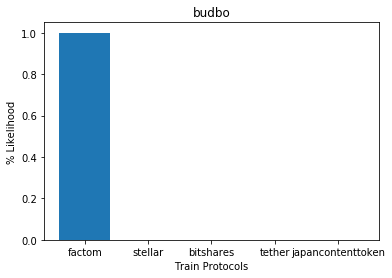

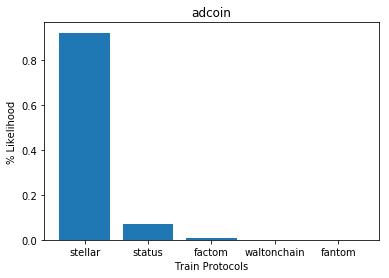

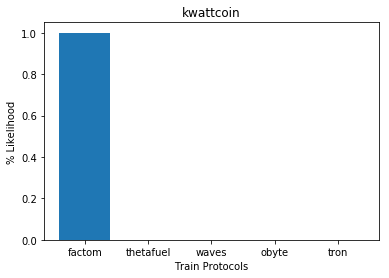

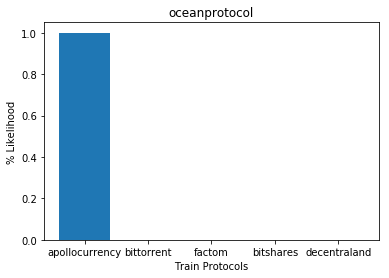

In [56]:
pd.options.display.float_format = '{}'.format
import matplotlib.pyplot as plt
for index, row in df_test_1.iterrows():
    frame = pd.DataFrame()
    frame["weights"] = row["Model_1"]
    frame["label"] = labels
    frame = frame.sort_values(by="weights", ascending=False)
    frame = frame.head(5)
    plt.bar(frame.label, frame.weights)
    plt.title(row["Protocol"]) 
    plt.xlabel("Train Protocols")
    plt.ylabel("% Likelihood")
    plt.show()

In [57]:
#Model 2
df_test_2.head()

,Text,Protocol,Model_2
0,global cannabis comehensive solution cannabis ...,budbo,product
1,...,budbo,none
2,platform ecosystem ...,budbo,roadmap
3,case ...,budbo,financial
4,token description ...,budbo,none


In [58]:
budbo = df_test_2[df_test_2.Protocol == 'budbo'].groupby(by="Model_2").count().sort_values(by="Text", ascending=False)
budbo['percentage'] = budbo['Text']/budbo['Text'].sum()

budbo = budbo.drop("none", axis=0).reset_index()


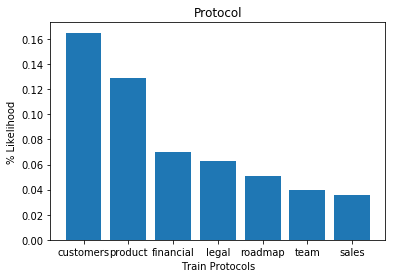

In [59]:
plt.bar(budbo.Model_2, budbo.percentage)
plt.title("Protocol") 
plt.xlabel("Train Protocols")
plt.ylabel("% Likelihood")
plt.show()

In [60]:
ocean = df_test_2[df_test_2.Protocol == 'oceanprotocol'].groupby(by="Model_2").count().sort_values(by="Text", ascending=False)

ocean['percentage'] = ocean['Text']/ocean['Text'].sum()

ocean = ocean.drop("none", axis=0).reset_index()


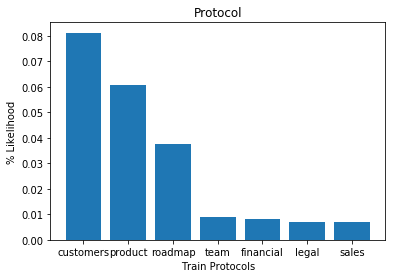

In [61]:
plt.bar(ocean.Model_2, ocean.percentage)
plt.title("Protocol") 
plt.xlabel("Train Protocols")
plt.ylabel("% Likelihood")
plt.show()

# 5- Inspiration

- https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52
- https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a
- https://github.com/kavgan/nlp-in-practice/blob/master/word2vec/Word2Vec.ipynb